In [29]:
import numpy as np
import os

"""
模型构建： 选择适当的模型架构，例如卷积神经网络（CNN）、深度神经网络（DNN）等，然后构建模型。

损失函数： 选择适当的损失函数，例如交叉熵损失函数（Cross-Entropy Loss）适用于分类任务。

优化算法： 选择一个优化算法，例如随机梯度下降（SGD）、Adam等，用于训练模型。

模型训练： 使用训练集对模型进行训练，训练过程中监控验证集上的性能以便及时停止训练或进行调整。

超参数调优： 调整模型的超参数，如学习率、批处理大小、层的数量和大小等，以优化模型性能。

模型评估： 使用测试集来最终评估模型的性能，包括准确度、精确度、召回率、F1分数等指标。

可视化和解释： 对模型进行可视化和解释，以便理解其内部工作方式和决策过程。

部署（可选）： 将训练好的模型部署到实际应用中，以进行实际的图像分类任务。
"""

# path file for reading
file_path = '../Datasets/pneumoniamnist.npz'
# load data from file
dataset = np.load(file_path)

In [30]:
#check the categries of the dataset
dataset.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [31]:
#load each category as a variable
#train data
train_images = dataset['train_images']
train_labels = dataset['train_labels']
#Validation data
val_images = dataset['val_images']
val_labels = dataset['val_labels']
#test data
test_images = dataset['test_images']
test_labels = dataset['test_labels']

# print the varibles
#train
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
#Validation
print("Validation Image Shape:", val_images.shape)
print("Validation Labels Shape:", val_labels.shape)
#test
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

# close the file
dataset.close()

Train Images Shape: (4708, 28, 28)
Train Labels Shape: (4708, 1)
Validation Image Shape: (524, 28, 28)
Validation Labels Shape: (524, 1)
Test Images Shape: (624, 28, 28)
Test Labels Shape: (624, 1)


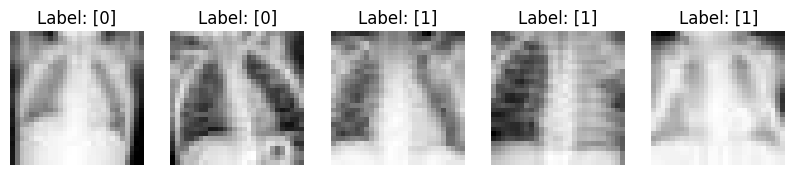

In [32]:
"""
random shows some image as an example
"""

import numpy as np
import matplotlib.pyplot as plt
import random

# random select image and show 5 images
def display_random_images(images, labels, num_images=5):
    # random select
    random_indices = random.sample(range(len(images)), num_images)
    # image format
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 3))
    if num_images == 1:
        axes = [axes]

    # 显示每个选中的图像
    for i, index in enumerate(random_indices):
        ax = axes[i]
        ax.imshow(images[index], cmap='gray')
        ax.axis('off')
        ax.set_title(f'Label: {labels[index]}')

    plt.show()

# 随机显示一些训练集图像
display_random_images(train_images, train_labels, num_images=5)


In [33]:
from PIL import Image, ImageEnhance, ImageOps, ImageFilter

# enhance datasets
def augment_image(image):
    # random flip left or right
    if random.random() < 0.5:
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # random rotate between -30 to 30 degrees
    rotation_angle = random.randint(-30, 30)
    image = image.rotate(rotation_angle)

    # random change the brightness of the image
    enhancer = ImageEnhance.Brightness(image)
    brightness_factor = random.uniform(0.8, 1.2)
    image = enhancer.enhance(brightness_factor)

    # Apply Gaussian noise with a probability of 0.3
    if random.random() < 0.3:
        image = image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0, 1)))
    
    return image

# combine the data of enhaced and origion
def augment_and_merge_dataset(images, labels, num_augmentations=5):
    augmented_images = []
    augmented_labels = []

    for i in range(len(images)):
        original_image = Image.fromarray(images[i])
        augmented_images.append(images[i])
        augmented_labels.append(labels[i])

        # enhance the data and add them to the origional and form the new dataset
        for _ in range(num_augmentations):
            augmented_image = augment_image(original_image)
            augmented_images.append(np.array(augmented_image)) 
            augmented_labels.append(labels[i])

    return np.array(augmented_images), np.array(augmented_labels)

# recall the function above
augmented_train_images, augmented_train_labels = augment_and_merge_dataset(train_images, train_labels, num_augmentations=5)

# print the datasets
print("Augmented Train Images Shape:", augmented_train_images.shape)
print("Augmented Train Labels Shape:", augmented_train_labels.shape)




Augmented Train Images Shape: (28248, 28, 28)
Augmented Train Labels Shape: (28248, 1)


In [34]:
# normalise the data (Origional)
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0
val_images_normalized = val_images / 255.0
# normalise the data (augmented)
augmented_train_images = augmented_train_images / 255.0

# check the normalise result if it is between 0 and 1
print("Train Images (Origional)- Min:", train_images_normalized.min(), "Max:", train_images_normalized.max())
print("Train Images (augmented)- Min:", augmented_train_images.min(), "Max:", augmented_train_images.max())
print("Test Images - Min:", test_images_normalized.min(), "Max:", test_images_normalized.max())


Train Images (Origional)- Min: 0.0 Max: 1.0
Train Images (augmented)- Min: 0.0 Max: 1.0
Test Images - Min: 0.0 Max: 0.996078431372549


Epoch 1/10
59/59 [==============================] - 1s 7ms/step - loss: 0.6560 - accuracy: 0.8176 - val_loss: 0.5756 - val_accuracy: 0.8397
Epoch 2/10
59/59 [==============================] - 0s 4ms/step - loss: 0.4298 - accuracy: 0.8885 - val_loss: 0.4116 - val_accuracy: 0.9002
Epoch 3/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.9020 - val_loss: 0.3874 - val_accuracy: 0.9002
Epoch 4/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3442 - accuracy: 0.9110 - val_loss: 0.3447 - val_accuracy: 0.9130
Epoch 5/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.9100 - val_loss: 0.3504 - val_accuracy: 0.8992
Epoch 6/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3051 - accuracy: 0.9286 - val_loss: 0.3317 - val_accuracy: 0.9140
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.9108 - val_loss: 0.3226 - val_accuracy: 0.9183
Epoch 8/10
59/59 [==

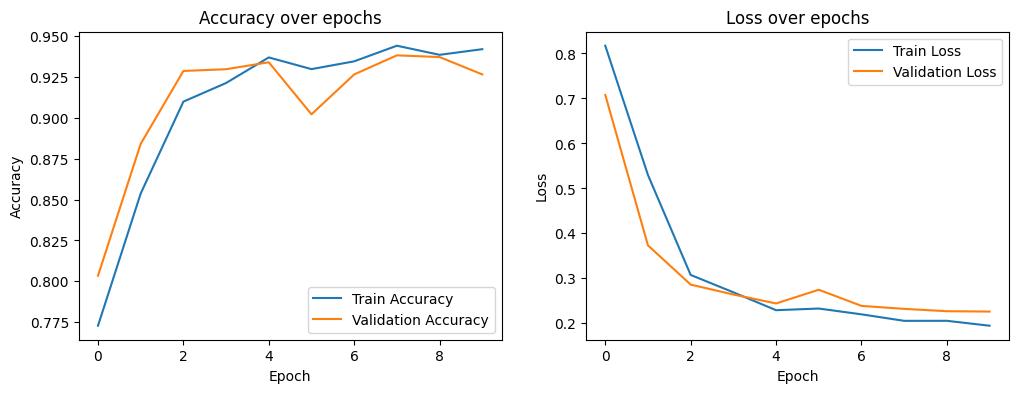

In [35]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# 对训练集、验证集和测试集的标签进行二元化
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)
# 设置交叉验证
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 初始化用于存储每次迭代的精确度和损失的列表
fold_acc = []
fold_loss = []

# 交叉验证循环
for train, val in kfold.split(train_images, train_labels):
    # 创建模型
    model = Sequential([
        Conv2D(5, kernel_size=3, activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], 1), kernel_regularizer=l2(0.01)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(9, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(5, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(2, activation='softmax')
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 训练模型
    history = model.fit(train_images[train], train_labels[train], validation_data=(train_images[val], train_labels[val]), epochs=10, batch_size=64)

    # 评估模型
    loss, accuracy = model.evaluate(train_images[val], train_labels[val])
    fold_acc.append(accuracy)
    fold_loss.append(loss)

# 打印交叉验证的结果
print("平均精确度: ", np.mean(fold_acc))
print("平均损失: ", np.mean(fold_loss))


# 绘制精确度和损失图
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold

# 数据和标签
# train_images, train_labels, val_images, val_labels, test_images, test_labels

# 将标签编码为二进制类矩阵
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

# 定义带有L2正则化的模型构建函数
def build_regularized_model(input_shape):
    model = Sequential([
        Conv2D(5, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(9, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(5, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(2, activation='softmax')
    ])
    return model

# K折交叉验证
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, val in kf.split(train_images, train_labels):
    model = build_regularized_model((train_images.shape[1], train_images.shape[2], 1))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(f'Training for fold {fold_no}...')
    
    history = model.fit(train_images[train], train_labels[train], 
                        validation_data=(train_images[val], train_labels[val]), 
                        epochs=10, batch_size=64)

    # 增加fold编号
    fold_no += 1

# 评估模型
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)
